# Analyse camera tracking data

### created by Chagas, Andre M 
### Distributed under CC BY SA 4.0 20200310

In [1]:
#import necessary libraries
import os

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set the file path 

filepath = "/mnt/d/repositories/rodent-tracking/test_data/all_data26.csv"

#filepath = "~/repositories/sussex_neuro/rodent-tracking/test_data/all_data_olenna2020-02-24T18_07_54.csv"
fid = pd.read_csv(filepath)

# rename columns so it is easier to call them 
# there is probably a better way of setting their names in Bonsai...

for key in fid.keys():
    
    secondDot = key.find(".",6)
    fid = fid.rename(columns = {key:key[secondDot+1:]})
    print(key[secondDot+1:])


Index(['Item1.Item1.wheelmoving', 'Item1.Item2.wheel.Item1.wheelROI.X',
       'Item1.Item2.wheel.Item1.wheelROI.Y',
       'Item1.Item2.wheel.Item1.wheelROI.Width',
       'Item1.Item2.wheel.Item1.wheelROI.Height',
       'Item1.Item2.wheel.Item2.wheel.Centroid.X',
       'Item1.Item2.wheel.Item2.wheel.Centroid.Y',
       'Item1.Item2.wheel.Item2.wheel.Orientation',
       'Item1.Item2.wheel.Item2.wheel.MajorAxisLength',
       'Item1.Item2.wheel.Item2.wheel.MinorAxisLength',
       'Item1.Item2.wheel.Item2.wheel.Area', 'Item2.Item1.mousemoving',
       'Item2.Item2.mouse.Item1.mouse.Centroid.X',
       'Item2.Item2.mouse.Item1.mouse.Centroid.Y',
       'Item2.Item2.mouse.Item1.mouse.Orientation',
       'Item2.Item2.mouse.Item1.mouse.MajorAxisLength',
       'Item2.Item2.mouse.Item1.mouse.MinorAxisLength',
       'Item2.Item2.mouse.Item1.mouse.Area',
       'Item2.Item2.mouse.Item2.mouseROI.X',
       'Item2.Item2.mouse.Item2.mouseROI.Y',
       'Item2.Item2.mouse.Item2.mouseROI.Widt

**travelled distance**


if there was only the mouse on the cage, the travelled distance would be: 
- given by pytagoras a2 = b2 X c2 for where b and c are x and y
dimensions, and their magnitude is the difference between 2 consecutive frames.

But the mouse has a wheel in its cage, so we need to add the "distance" the wheel
travelled to the distance travelled by the animal (since while running on the wheel,
the animal is static in relation to the cage and camera).

so in the end we want the distance travelled by the mouse while it was NOT on 
the wheel, plus the distance travelled by the wheel, while the wheel was moving


In [ ]:
### mouse distance X when wheel was NOT moving
#get boolean array for when mouse is moving, but wheel is not:
fid  = fid.join(pd.Series(data = (fid["mousemoving"] & ~fid["wheelmoving"]),name="onlymouse"))
print(fid["onlymouse"])

In [ ]:
### mouse distance X 
mouseXdist = fid["mouse.Item1.mouse.Centroid.X"].diff()
### mouse distance Y 
mouseYdist = fid["mouse.Item1.mouse.Centroid.Y"].diff()



In [ ]:
# total distance using pytagoras, and excluding the times when the mouse was on the wheel
mouseTotalDist = np.sqrt(mouseXdist[fid["onlymouse"]]**2+mouseYdist[fid["onlymouse"]]**2) 

**calculate distance travelled while on the wheel**

The wheel has a black marker that is used to track its movement. the tracker is set close to the center of the wheel and the readings we have to work with are X and Y positions of this tracker in relation to the edge of the WheelROI, the next cell plots the raw data

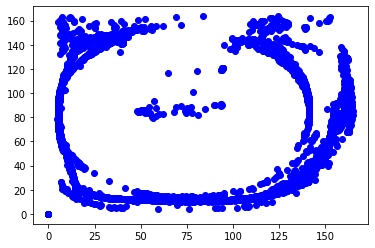

In [6]:
plt.plot(fid["wheel.Item2.wheel.Centroid.X"],fid["wheel.Item2.wheel.Centroid.Y"],'bo')